In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment
from scipy.io.wavfile import read
from  IPython.display import Audio
from scipy.signal import butter, lfilter
from scipy.io.wavfile import write
from statistics import mean

c:\Users\Asus\OneDrive - Universidad de Antioquia\Documentos\proyect\workspace\Proyectos PDS\PDSp\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
def butter_lowpass(cutoff, fs, order=6):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
file_audio=('acordes.wav')
fs,x=read(file_audio)
print(x)
print(f'la frecuencia de muestreo es {fs}')
# x_seconds=x[:2*fs]
time=np.arange(0,len(x)/fs,1.0/fs)
if len(x) > len(time):
    x = x[:len(time)]
elif len(x) < len(time):
    time = time[:len(x)]

# Graficar la forma de onda de audio
plt.figure(figsize=(30, 10))
plt.plot(time, x)
plt.title("Forma de Onda de Audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()
#Reproducción de la señal de audio. 

audio = AudioSegment.from_file("acordes.wav")

#Especifica la ruta del archivo de audio
audio_file = 'acordes.wav'
#Crea un widget de audio y reprodúcelo
audio = Audio(filename=audio_file, autoplay=True)
audio

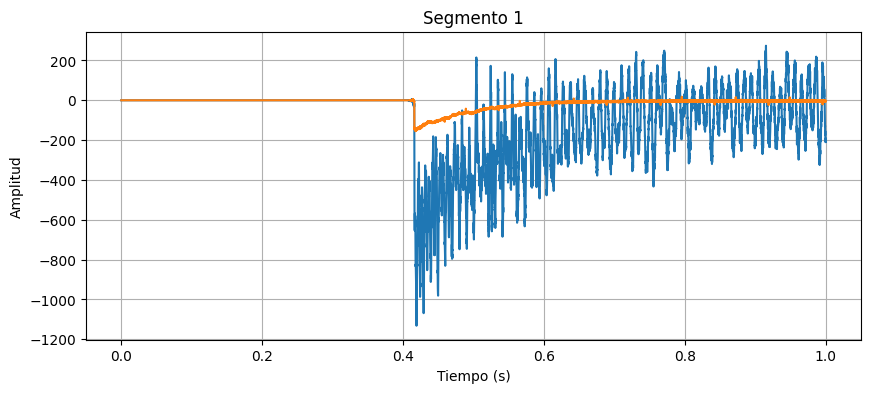

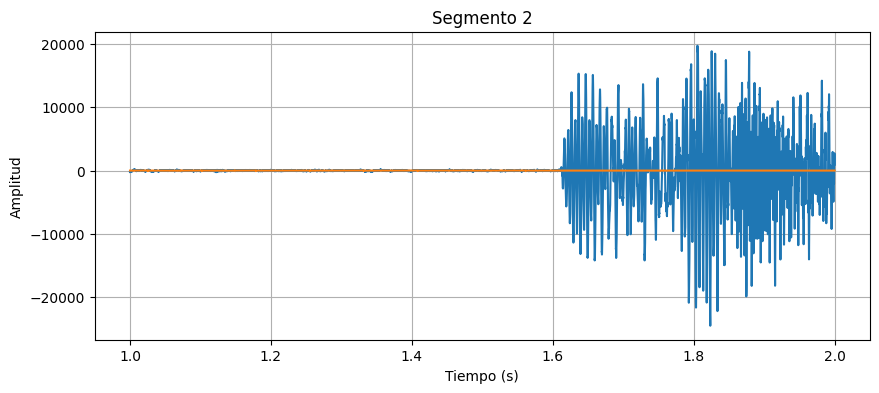

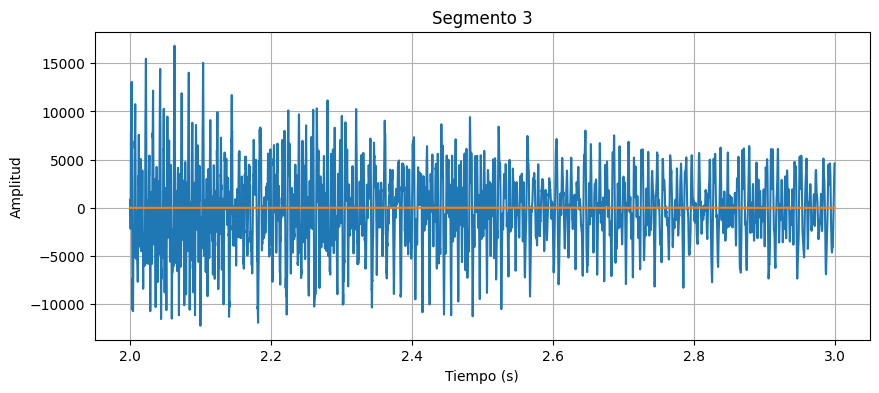

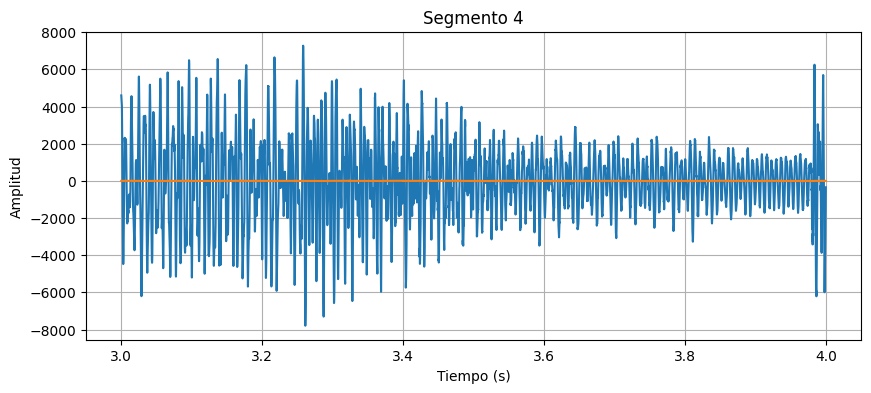

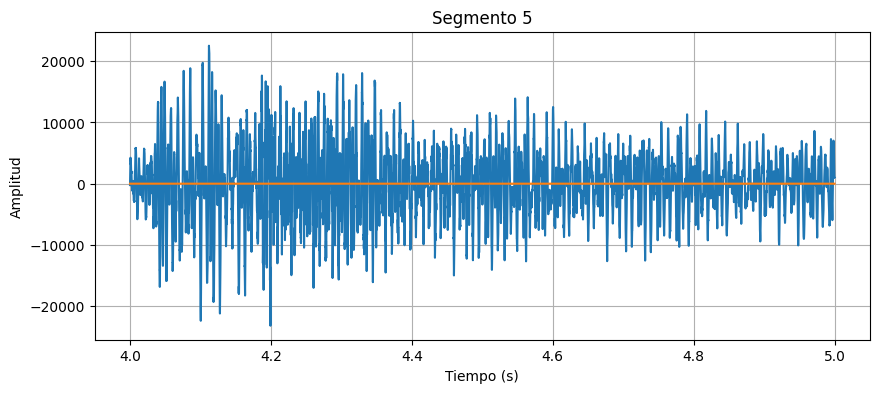

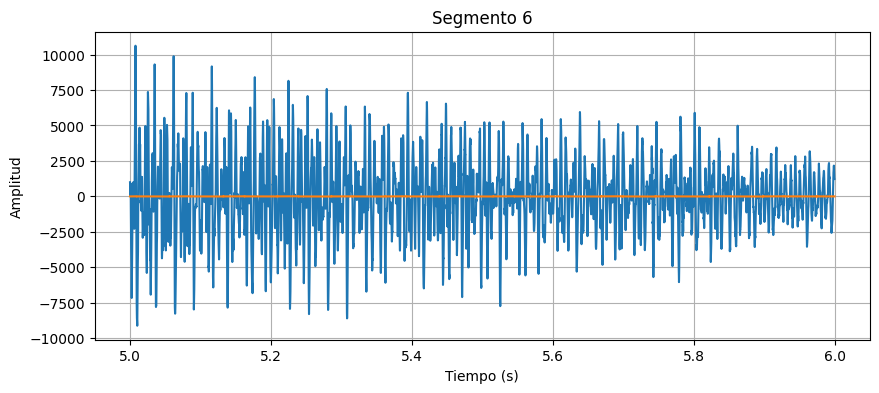

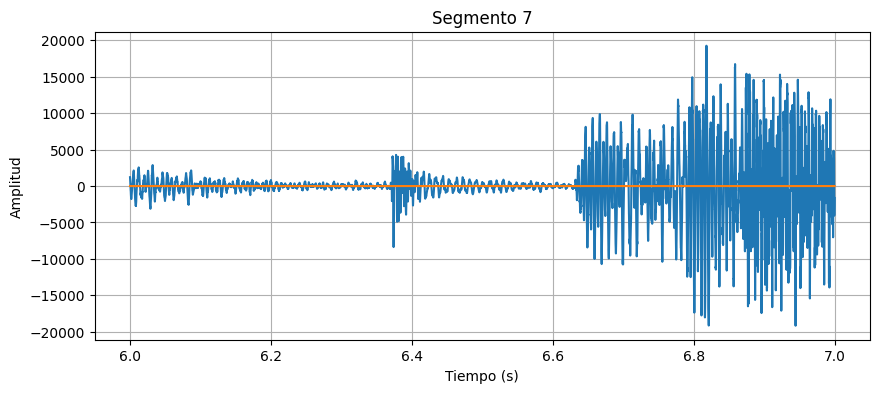

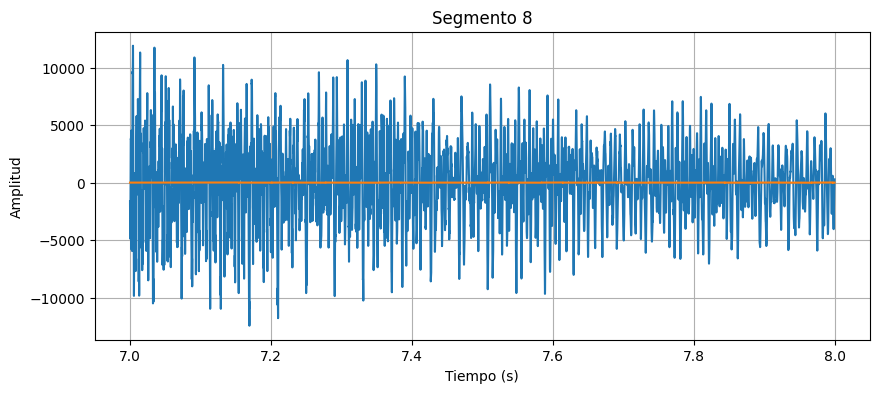

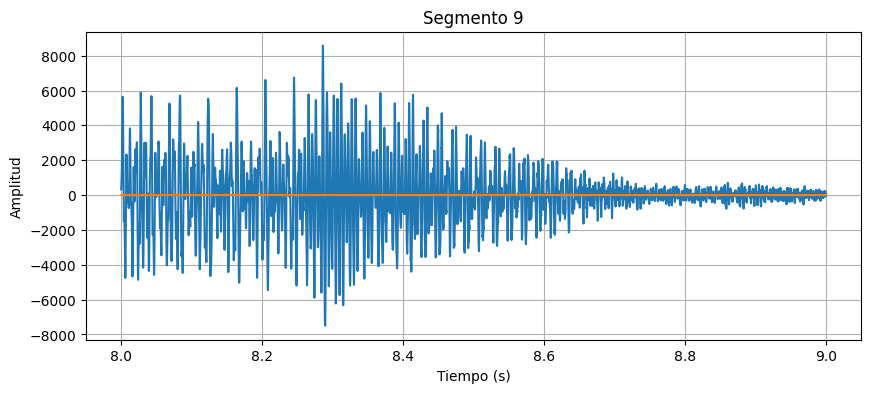

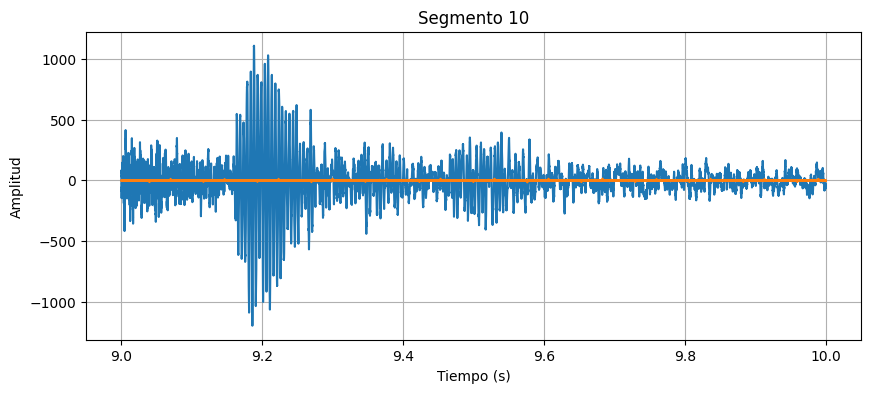

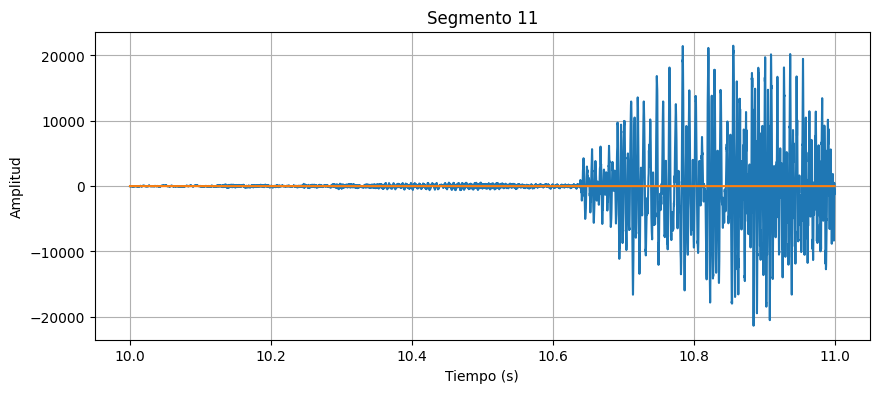

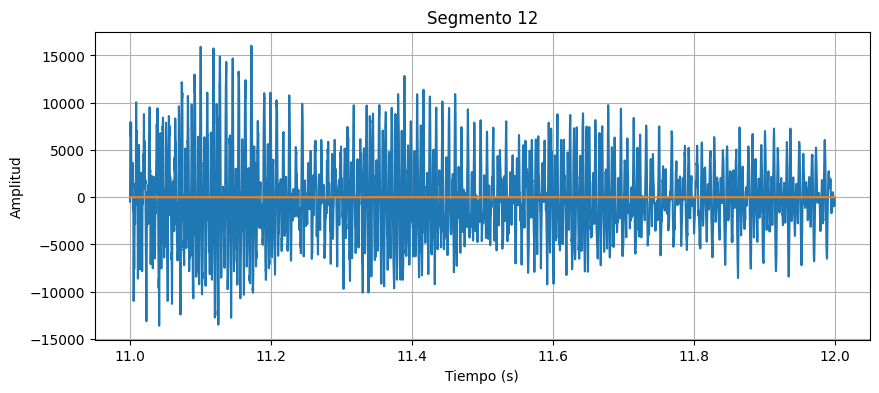

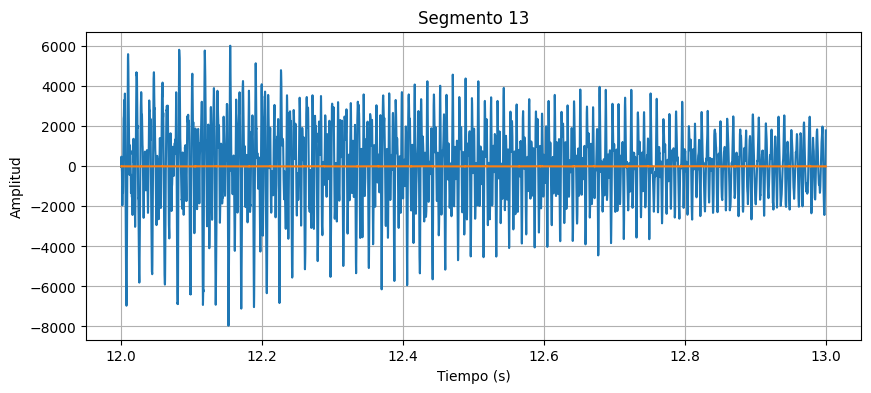

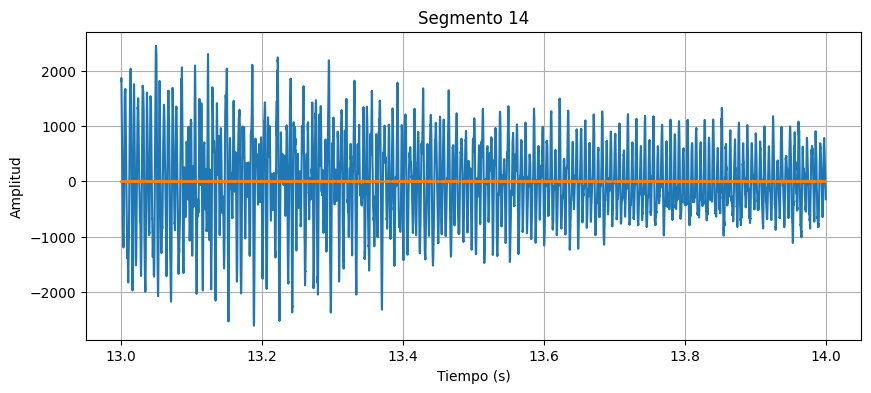

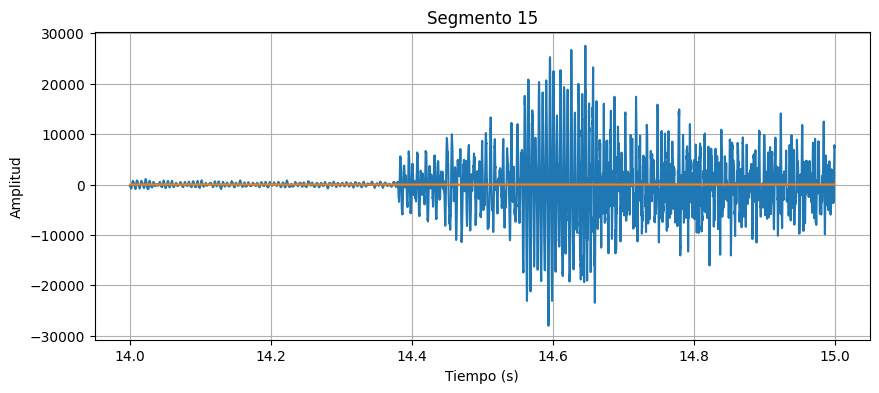

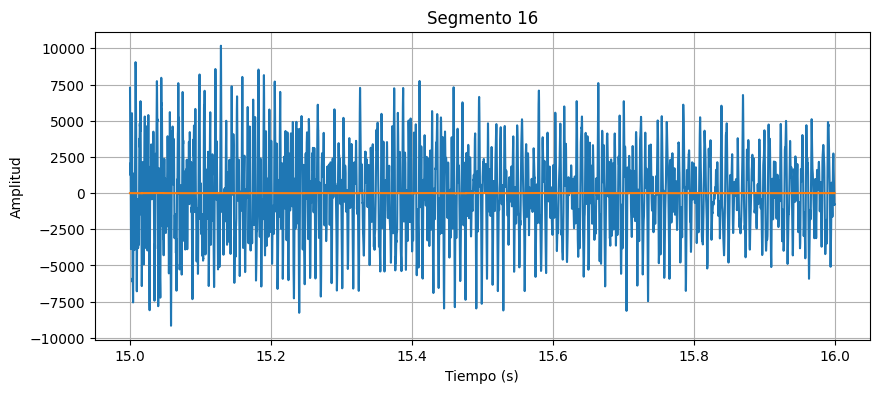

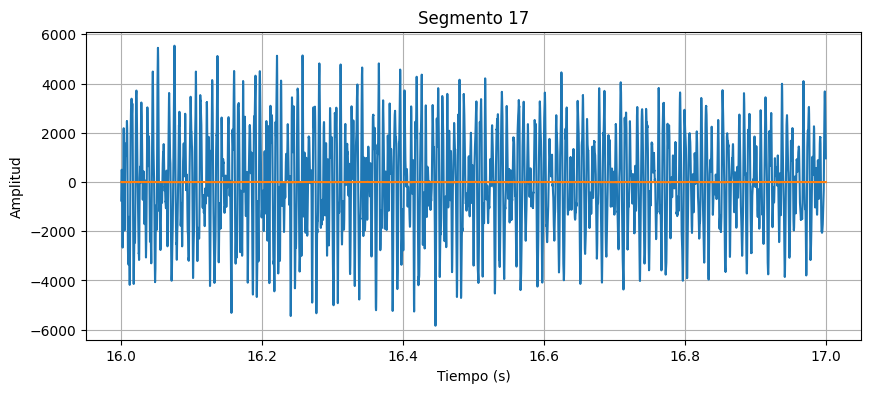

In [17]:
segment_duration = 1  # Duración de cada segmento en segundos
samples_per_segment = int(segment_duration * fs)
num_segments = len(x) // samples_per_segment

# Procesar cada segmento
for segment_idx in range(num_segments):
    start = segment_idx * samples_per_segment
    end = start + samples_per_segment
    segment = x[start:end]

    # Aquí puedes realizar el análisis de acordes para cada segmento
    # Puedes utilizar la librería librosa o cualquier otra que prefieras.

    # Graficar el segmento (puedes quitar esto si no es necesario)
    time = np.arange(start / fs, end / fs, 1.0 / fs)
    plt.figure(figsize=(10, 4))
    plt.plot(time, segment)
    plt.title(f"Segmento {segment_idx + 1}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.show()

# Reproducir el audio completo
audio = AudioSegment.from_file("acordes.wav")
audio_file = 'acordes.wav'
audio = AudioSegment.from_file(audio_file)

In [ ]:
def apply_dft(segment, fs):
    N = len(segment)
    T = 1.0 / fs
    # Calcular la DFT
    dft = np.fft.fft(segment)
    # Calcular las frecuencias correspondientes
    freqs = np.fft.fftfreq(N, T)
    return freqs, dft


def detect_chords(freqs, dft):
    threshold = 0.1  # Umbral para considerar un pico
    peaks = np.where(abs(dft) > threshold)[0]  # Obtener índices de los picos
    detected_chords = []
    
    for peak in peaks:
        # Aquí puedes mapear las frecuencias a notas musicales y acordes
        freq = freqs[peak]
        note = map_freq_to_note(freq)  # Usamos la función map_freq_to_note
        detected_chords.append(note)
    
    return detected_chords


def map_freq_to_note(freq, tuning_freq=440.0):
    # Frecuencia de referencia (A4 en afinación estándar)
    A4 = tuning_freq
    
    # Factor de conversión para semitonos (12 semitonos por octava)
    semitone_ratio = 2 ** (1 / 12)
    
    # Calcular la distancia en semitonos desde A4
    semitone_distance = 12 * np.log2(freq / A4)
    
    # Notas musicales (0 = A4, 12 = A5, -12 = A3, etc.)
    note_names = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]
    
    # Determinar la nota más cercana
    nearest_note = note_names[int(round(semitone_distance)) % 12]
    
    return nearest_note




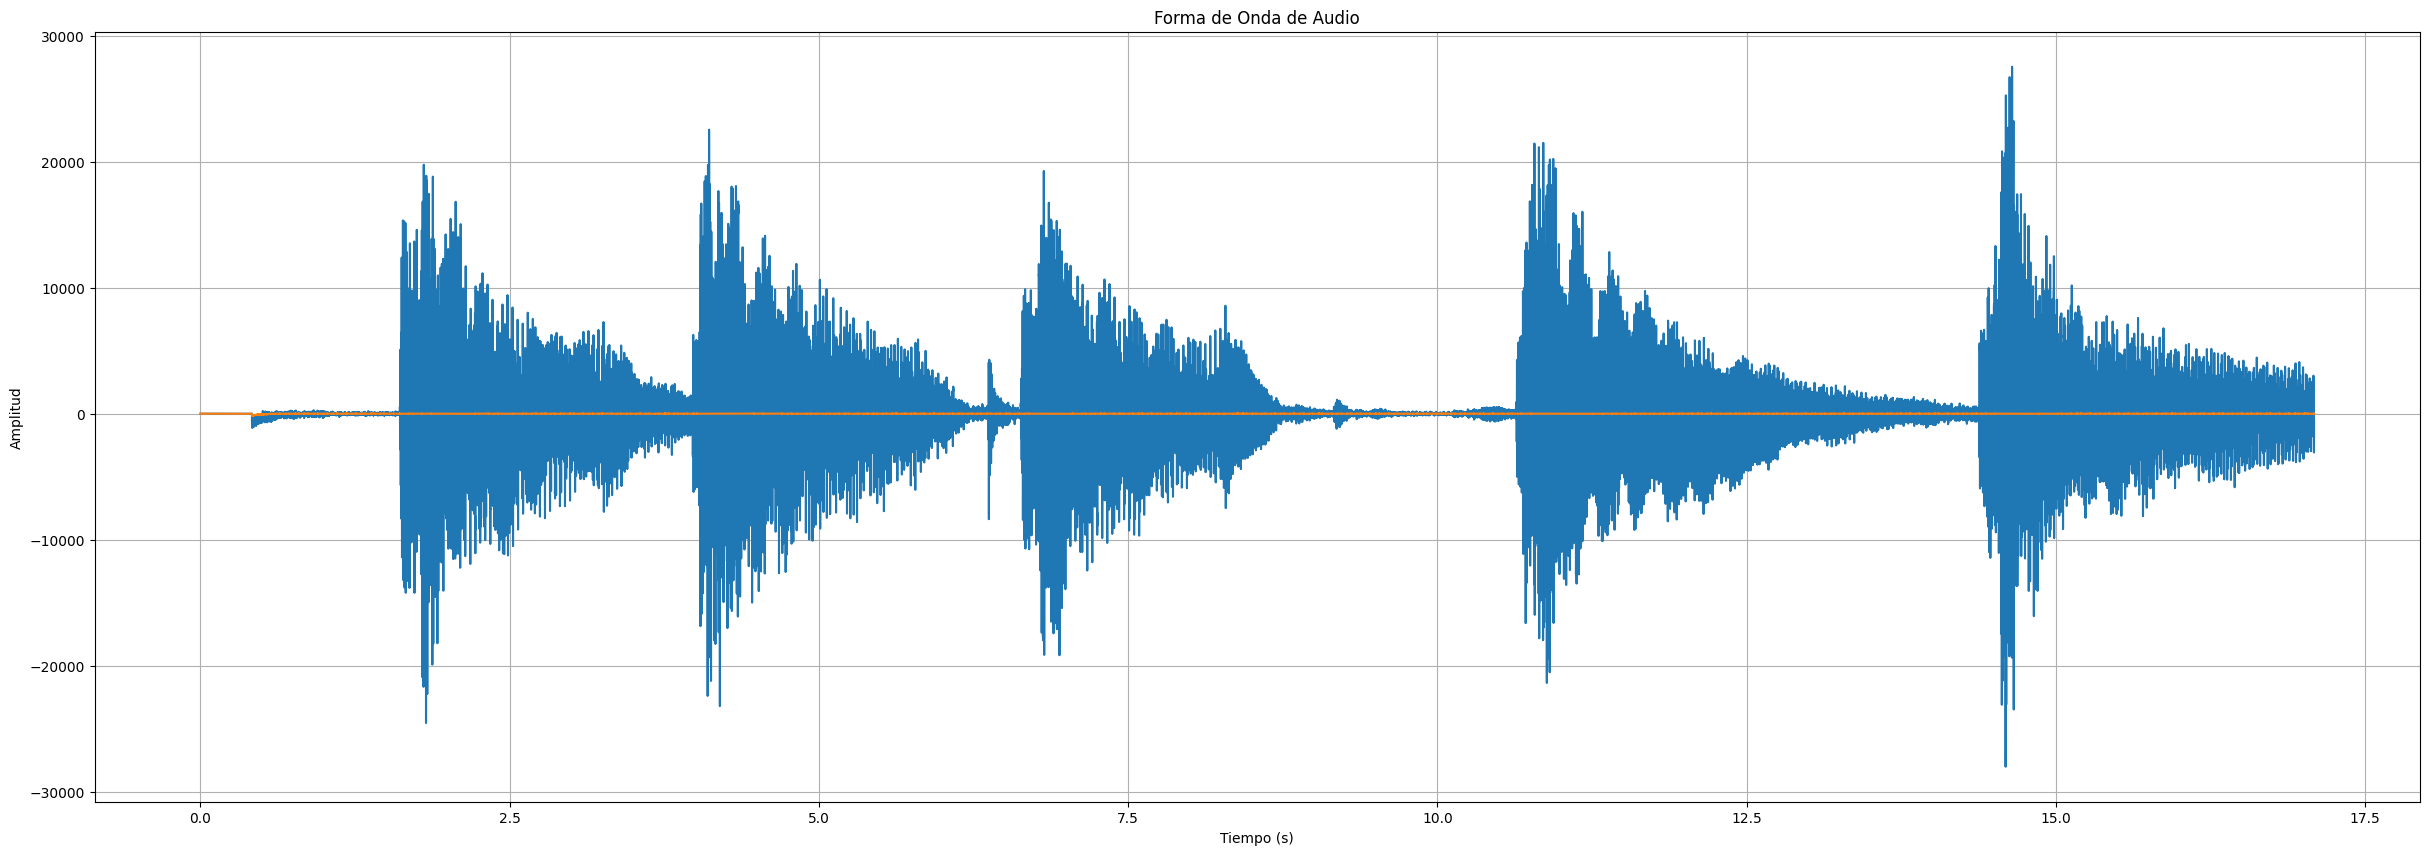

C:\Users\Asus\AppData\Local\Temp\ipykernel_21280\2907733809.py:11: RuntimeWarning: invalid value encountered in log2
  semitone_distance = 12 * np.log2(freq / A4)


ValueError: cannot convert float NaN to integer

In [20]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

def map_freq_to_note(freq, tuning_freq=440.0):
    A4 = tuning_freq
    semitone_ratio = 2 ** (1 / 12)
    
    if np.isfinite(freq):  # Verificar si la frecuencia es finita
        semitone_distance = 12 * np.log2(freq / A4)
        note_names = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]
        nearest_note = note_names[int(round(semitone_distance)) % 12]
        return nearest_note
    else:
        return None

def detect_chords(freqs, dft):
    threshold = 0.1  # Umbral para considerar un pico
    peaks = np.where(abs(dft) > threshold)[0]  # Obtener índices de los picos
    detected_chords = []

    for peak in peaks:
        freq = freqs[peak]
        note = map_freq_to_note(freq)  # Mapear frecuencia a nota
        detected_chords.append(note)

    return detected_chords

# Cargar el archivo de audio
file_audio = 'acordes.wav'
fs, x = wavfile.read(file_audio)

# Graficar la forma de onda de audio
time = np.arange(0, len(x) / fs, 1.0 / fs)
if len(x) > len(time):
    x = x[:len(time)]
elif len(x) < len(time):
    time = time[:len(x)]

plt.figure(figsize=(30, 10))
plt.plot(time, x)
plt.title("Forma de Onda de Audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

# Dividir el audio en segmentos
segment_size = 1024
num_segments = len(x) // segment_size
chords_detected = []

for i in range(num_segments):
    start = i * segment_size
    end = start + segment_size
    segment = x[start:end]
    
    dft = np.abs(np.fft.fft(segment))
    freqs = np.fft.fftfreq(len(segment), 1 / fs)
    
    chords = detect_chords(freqs, dft)
    chords_detected.extend(chords)

print("Notas detectadas en cada segmento:", chords_detected)


PROCESO DE FILTRADO DE LA SEÑAL. 

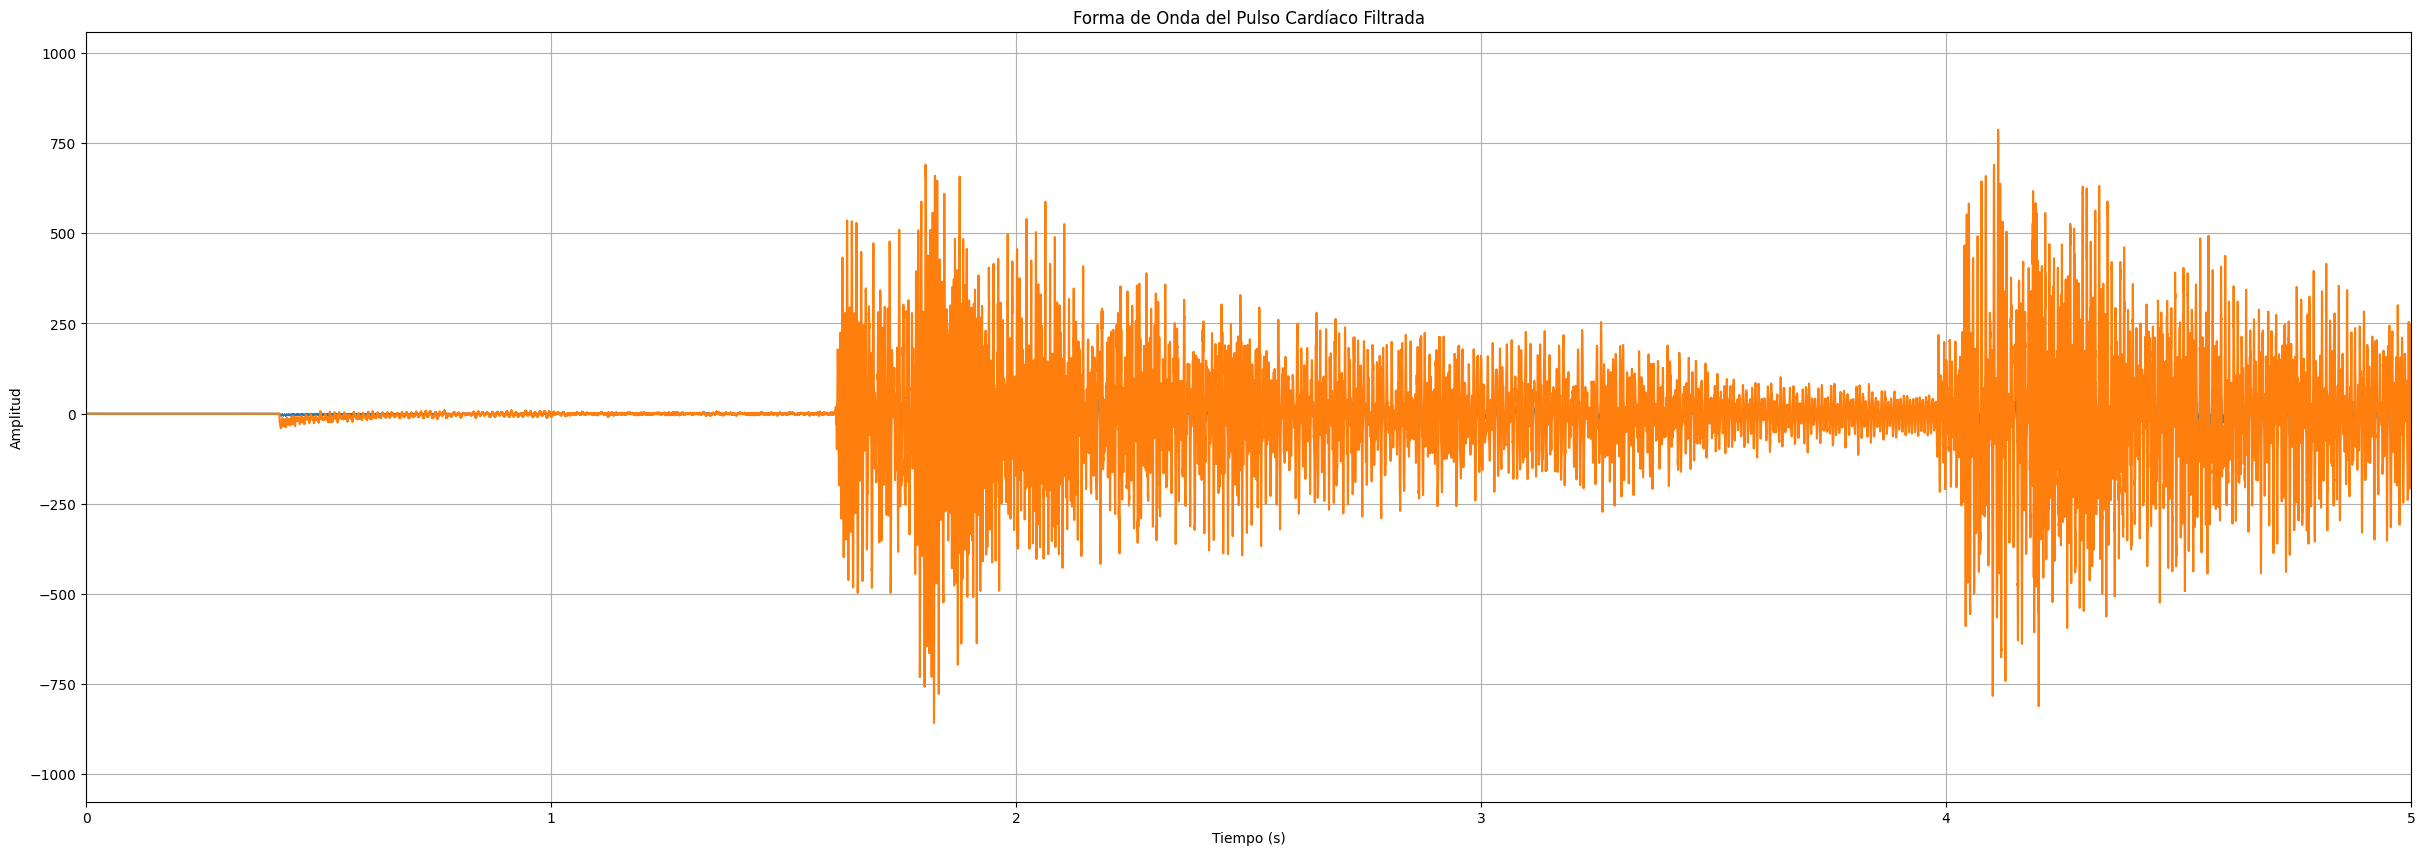

In [16]:

cutoff_frequency =5000  # Ajusta la frecuencia de corte según tus necesidades
order = 4  # Orden del filtro, ajusta según tus necesidades

# Aplicar el filtro a la señal del pulso cardíaco
filtered_signal = butter_lowpass_filter(x, cutoff_frequency, fs, order)

# Crear un vector de tiempo para la señal filtrada
time_filtered = np.arange(0, len(filtered_signal) / fs, 1.0 / fs)

if len(filtered_signal) > len(time_filtered):
    filtered_signal = filtered_signal[:len(time_filtered)]
elif len(filtered_signal) < len(time_filtered):
    time_filtered = time_filtered[:len(filtered_signal)]

# Graficar la forma de onda de la señal del pulso cardíaco filtrada
plt.figure(figsize=(30, 10))
plt.xlim(0,5)
plt.plot(time_filtered, filtered_signal)
plt.title("Forma de Onda del Pulso Cardíaco Filtrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

write("filtered_audio.wav", fs, np.int16(filtered_signal))

audio = AudioSegment.from_file("filtered_audio.wav")

#Especifica la ruta del archivo de audio
audio_file = 'filtered_audio.wav'
#Crea un widget de audio y reprodúcelo
audio = Audio(filename=audio_file, autoplay=True)
audio

ValueError: x and y must have same first dimension, but have shapes (2,) and (56944,)

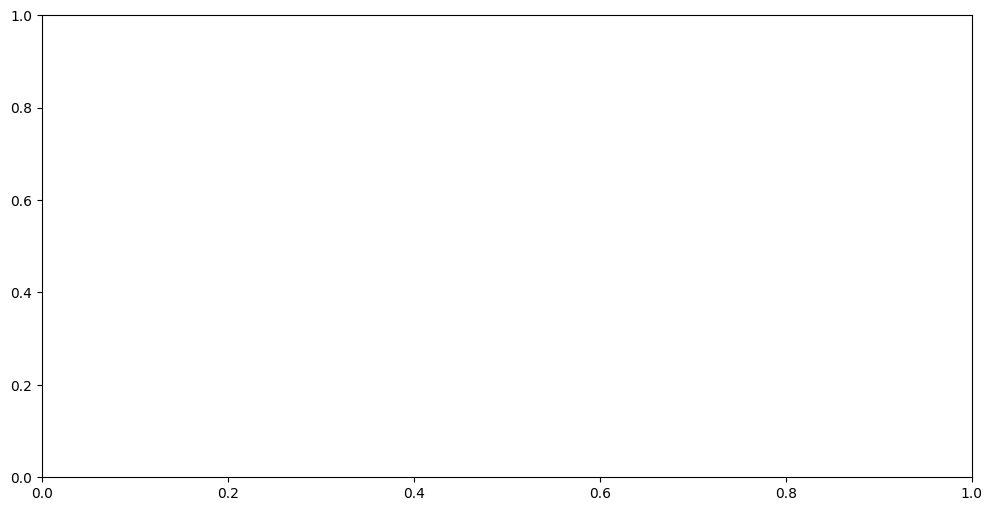

In [30]:
latidos = []

# Segmentar la señal en latidos
for i in range(len(peaks) - 1):
    latido = xf[peaks[i]:peaks[i + 1]]
    latidos.append(latido)

# Calcular la DFT de cada latido
espectros_de_frecuencia = []
for latido in latidos:
    N = len(latido)
    espectro = np.abs(np.fft.fft(latido))
    frecuencias = np.fft.fftfreq(N, 1 / fs)
    espectros_de_frecuencia.append((frecuencias, espectro))

# Promediar los espectros de frecuencia
# Encuentra la longitud máxima de los espectros de frecuencia
max_length = max(len(espectro) for _, espectro in espectros_de_frecuencia)

# Rellena los espectros de frecuencia con ceros para que tengan la misma longitud
espectros_de_frecuencia = [(frecuencias, np.pad(espectro, (0, max_length - len(espectro)))) for _, espectro in espectros_de_frecuencia]

# Calcula el espectro de frecuencia promedio
espectro_promedio = np.mean([espectro for _, espectro in espectros_de_frecuencia], axis=0)
# Visualizar el espectro promedio
plt.figure(figsize=(12, 6))
plt.plot(espectros_de_frecuencia[0][0], espectro_promedio)  # Accede a las frecuencias desde espectros_de_frecuencia[0][0]
plt.title("Espectro de Frecuencia Promedio")
plt.xlabel("Frecuencia (Hz)")
plt.grid()

plt.show()

In [1]:
import numpy as np
from scipy.io import wavfile

# Cargar el archivo de audio
audio_file = 'tu_archivo_de_audio.wav'
fs, x = wavfile.read(audio_file)

# Diseñar los filtros para las frecuencias DTMF
f1 = [697, 770, 852, 941]
f2 = [1209, 1336, 1477]
dtmf = f1 + f2

# Inicializar matrices para almacenar las amplitudes de las frecuencias DTMF
amplitudes_f1 = np.zeros(len(dtmf))
amplitudes_f2 = np.zeros(len(dtmf))

# Calcular la DFT de la señal de audio
X = np.fft.fft(x)
N = len(x)
frequencies = np.arange(N) * (fs / N)

# Calcular las amplitudes de las frecuencias DTMF
for i in range(len(dtmf)):
    f1_freq = dtmf[i]
    f2_freq = dtmf[i + len(f1)]

    index_f1 = np.argmin(np.abs(frequencies - f1_freq))
    index_f2 = np.argmin(np.abs(frequencies - f2_freq))

    amplitudes_f1[i] = np.abs(X[index_f1])
    amplitudes_f2[i] = np.abs(X[index_f2])

# Encontrar las frecuencias DTMF dominantes
threshold = 0.2  # Ajusta este valor según tus necesidades
max_amplitude_f1 = max(amplitudes_f1)
max_amplitude_f2 = max(amplitudes_f2)
dominant_f1 = [i for i, amplitude in enumerate(amplitudes_f1) if amplitude > threshold * max_amplitude_f1]
dominant_f2 = [i for i, amplitude in enumerate(amplitudes_f2) if amplitude > threshold * max_amplitude_f2]

# Mapear las frecuencias dominantes a dígitos
dtmf_symbols = [['1', '2', '3', 'A'], ['4', '5', '6', 'B'], ['7', '8', '9', 'C'], ['*', '0', '#', 'D']]

if dominant_f1 and dominant_f2:
    detected_digit = dtmf_symbols[dominant_f2[0]][dominant_f1[0]]
    print(f'El dígito detectado es: {detected_digit}')
else:
    print('No se detectó ninguna señal DTMF.')


FileNotFoundError: [Errno 2] No such file or directory: 'tu_archivo_de_audio.wav'